In [1]:
from gurobipy import *
import numpy as np
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd


# Pregunta 1

In [2]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';', decimal=',')
print(data)


           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


### Pregunta 1.1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [3]:
import numpy as np
import time
import random
def centro_euclidiano(x=0, y=0, data=0, logs = True):
    contador = 0
    time_0 = time.time()
    while (True):
        contador += 1
        g_i = (data.iloc[:,2])/(np.sqrt((x-data.iloc[:,0])**2+(y-data.iloc[:,1])**2))
        
        x_new = np.sum(data.iloc[:,0]*g_i)/np.sum(g_i)
        y_new = np.sum(data.iloc[:,1]*g_i)/np.sum(g_i)
        
        if (abs(x-x_new) < 1e-5 and abs(y-y_new) < 1e-5):
            if logs:
                print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new} en un tiempo de {time.time()-time_0} en {contador} iteraciones')
            return x_new, y_new, time.time()-time_0, contador
            break
        
        x, y = x_new, y_new
        
x,y = random.uniform(data.iloc[:,0].min(), data.iloc[:,0].max()), random.uniform(data.iloc[:,1].min(), data.iloc[:,1].max())
centro_euclidiano(x, y, data)

El modelo de localización arrojó las coordenadas x: -2.1916754676757546 y: -4.507456194950678 en un tiempo de 0.023112058639526367 en 29 iteraciones


(-2.1916754676757546, -4.507456194950678, 0.023231029510498047, 29)

### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

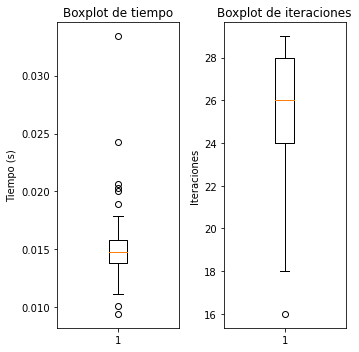

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -2.059784   -4.202194    0.015134    25.600000
std      0.000012    0.000004    0.002769     2.374103
min     -2.059802   -4.202198    0.009434    16.000000
25%     -2.059797   -4.202197    0.013867    24.000000
50%     -2.059777   -4.202196    0.014758    26.000000
75%     -2.059775   -4.202189    0.015801    28.000000
max     -2.059772   -4.202187    0.033395    29.000000
           x         y    tiempo  iteraciones
0  -2.059773 -4.202198  0.016420         27.0
1  -2.059777 -4.202196  0.015051         26.0
2  -2.059800 -4.202188  0.014829         26.0
3  -2.059798 -4.202189  0.014757         25.0
4  -2.059802 -4.202188  0.012311         23.0
..       ...       ...       ...          ...
95 -2.059775 -4.202197  0.013216         23.0
96 -2.059778 -4.202196  0.015984         28.0
97 -2.059774 -4.202197  0.014959         26.0
98 -2.059772 -4.202198  0.014234         25.0

In [4]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = data_sample.iloc[:,0].max()
min_value_x = data_sample.iloc[:,0].min()
max_value_y = data_sample.iloc[:,1].max()
min_value_y = data_sample.iloc[:,1].min()

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.uniform(min_value_x,max_value_x)
    y=random.uniform(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [5]:
data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = data_50.iloc[:,0].max()
min_value_x_50 = data_50.iloc[:,0].min()
max_value_y_50 = data_50.iloc[:,1].max()
min_value_y_50 = data_50.iloc[:,1].min()

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.uniform(min_value_x_50,max_value_x_50)
    y=random.uniform(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(),'\n')

###### Para los primeros 100 ######

max_value_x_100 = data_100.iloc[:,0].max()
min_value_x_100 = data_100.iloc[:,0].min()
max_value_y_100 = data_100.iloc[:,1].max()
min_value_y_100 = data_100.iloc[:,1].min()

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.uniform(min_value_x_100,max_value_x_100)
    y=random.uniform(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]

print(df_estadisticos_100.describe(),'\n')

###### Para los primeros 500 ######

max_value_x_500 = data_500.iloc[:,0].max()
min_value_x_500 = data_500.iloc[:,0].min()
max_value_y_500 = data_500.iloc[:,1].max()
min_value_y_500 = data_500.iloc[:,1].min()

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.uniform(min_value_x_500,max_value_x_500)
    y=random.uniform(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_500.describe(),'\n')

    
###### Para los primeros 1000 ######

max_value_x_1000 = data.iloc[:,0].max()
min_value_x_1000 = data.iloc[:,0].min()
max_value_y_1000 = data.iloc[:,1].max()
min_value_y_1000 = data.iloc[:,1].min()

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.uniform(min_value_x,max_value_x)
    y=random.uniform(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_1000.describe(),'\n')



                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.262508   -6.729400    0.014769    24.910000
std      0.000011    0.000003    0.003785     1.864582
min     -3.262526   -6.729403    0.010171    19.000000
25%     -3.262522   -6.729402    0.013310    24.000000
50%     -3.262501   -6.729402    0.014001    25.000000
75%     -3.262500   -6.729397    0.015358    26.000000
max     -3.262497   -6.729396    0.043805    29.000000 

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.986384   -5.046102    0.012027    21.370000
std      0.000007    0.000003    0.001058     1.440083
min     -3.986399   -5.046113    0.009068    17.000000
25%     -3.986392   -5.046102    0.011300    20.000000
50%     -3.986381   -5.046102    0.012013    22.000000
75%     -3.986379   -5.046101    0.012756    22.000000
max     -3.986377   -5.046098    0.015535    24.000000 

      

### Graficamos los resultados

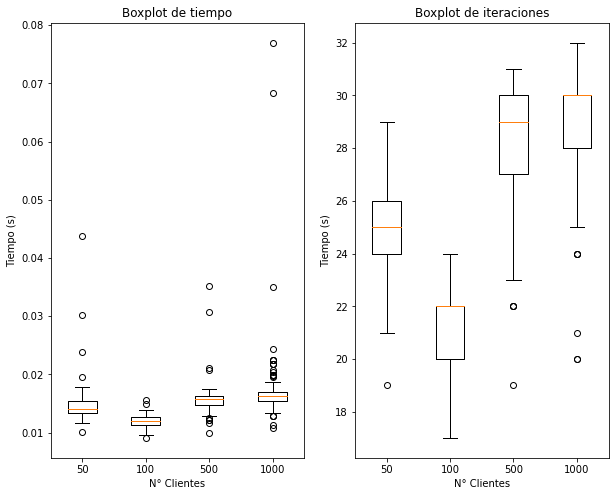

In [6]:
# Comparamos Boxplots

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.boxplot([df_estadisticos_50['tiempo'], df_estadisticos_100['tiempo'], df_estadisticos_500['tiempo'], df_estadisticos_1000['tiempo']], labels=['50', '100', '500', '1000'])
plt.title('Boxplot de tiempo')
plt.ylabel('Tiempo (s)')
plt.xlabel('N° Clientes')


plt.subplot(1,2,2)
plt.boxplot([df_estadisticos_50['iteraciones'], df_estadisticos_100['iteraciones'], df_estadisticos_500['iteraciones'], df_estadisticos_1000['iteraciones']], labels=['50', '100', '500', '1000'])
plt.title('Boxplot de iteraciones')
plt.ylabel('Tiempo (s)')
plt.xlabel('N° Clientes')
plt.show()

### A continuación incluiré gráficos de líneas para ver desde otra perspectiva las comparaciones en tiempo e iteraciones de los distintas muestras

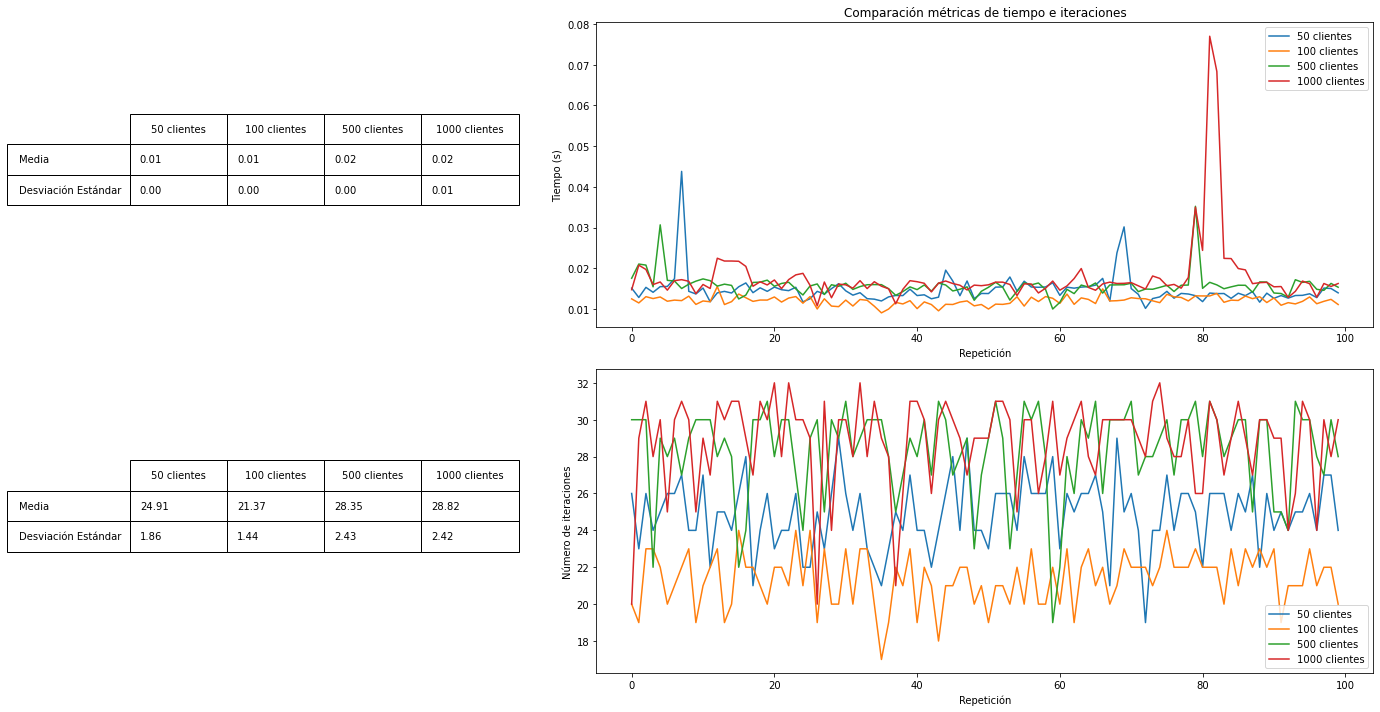

In [7]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


### Resultados 1.3

#### Comparación en tiempo

A medida que se incrementa el número de clientes, el tiempo de demora en llegar al punto óptimo no tiene un verdadero crecimiento, teniendo medias y distribuciones similares. Esto puede deberse a que el tamaño máximo de clientes (1000) no significa un gran impacto en el procesamiento de estos; de todas maneras, se ve un ligero aumento en el tiempo de procesamiento desde los 100 clientes en adelante.

#### Comparación en iteraciones

En este caso si se logra ver una diferencia más clara en la cantidad de iteraciones para cada muestra. Esto puede depender de la distribución de cada una; de todas maneras (sin tomar en cuenta la muestra de 100 clientes) se logra ver que a medida que hay una mayor cantidad de clientes siendo procesados por el algoritmo, aumenta la cantidad de iteraciones necesarias para llegar al punto óptimo. Como se mencionó anteriormente, a medida que hay una mayor densidad de datos, las distribuciones de cada muestra van cambiando, y en este caso la desviación que existe en las coordenadas de los clientes va aumentando junto con el tamaño de la muestra, lo que explica por qué se necesita un mayor número de iteraciones para encontrar el punto óptimo.

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [8]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

print(f'Las coordenadas iniciales son x: {x_inicial} y: {y_inicial}')

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])


posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data)


Las coordenadas iniciales son x: -0.0038841977700827014 y: -3.5328516280344124
El modelo de localización arrojó las coordenadas x: -2.191675977613607 y: -4.507456206315952 en un tiempo de 0.020410776138305664 en 27 iteraciones


### Resultados 1.4

Logramos ver que el hecho de calcular las coordenadas en vez de escoger coordenadas al azar tiene una mejora en la cantidad de iteraciones necesarias para procesar 1000 clientes. En este caso, usando coordenadas al azar se necesita un promedio de 29 iteraciones, versus 27 iteraciones cuando se calculan las coordenadas iniciales con distancia cuadrática. Esto es justamente gracias a que para el cálculo de las coordenadas iniciales, se hace una ponderación de los mismos datos, lo que lleva un punto inicial mucho más cercano al óptimo de lo que podría ser un punto al azar.

# Problema 1.5

In [9]:
# Crear el modelo de optimización con Gurobi
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import time
modelo= gp.Model("Modelo 1.5")

# Variables de decisión: Coordenadas x_i y y_i (son continuas)
x_i = modelo.addVar(vtype=GRB.CONTINUOUS, name="x_i", lb=-GRB.INFINITY, ub=GRB.INFINITY)
y_i = modelo.addVar(vtype=GRB.CONTINUOUS, name="y_i", lb=-GRB.INFINITY, ub=GRB.INFINITY)


# Función objetivo: Minimizar la suma ponderada de las distancias cuadráticas
modelo.setObjective(gp.quicksum(data.iloc[i, 2] * ((x_i - data.iloc[i, 0])**2 + (y_i - data.iloc[i, 1])**2) for i in range(1000)), GRB.MINIMIZE)


# Medir el tiempo de optimización
start_time = time.time()
modelo.optimize()
end_time = time.time()





Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-12
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x11ba164e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+03, 1e+06]
  QObjective range [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 2.85804872e+07


In [10]:
# Obtener resultados: tiempo de ejecución, número de iteraciones, y solución óptimo
if modelo.status == GRB.OPTIMAL:
    tiempo_ejecucion = end_time - start_time
    iteraciones = modelo.itercount  # Número de iteraciones
    x_optimo = x_i.X
    y_optimo = y_i.X
    valor_objetivo = modelo.ObjVal

    # Mostrar los resultados
    print("Distancia óptima:",(modelo.ObjVal))
    print("Solución óptima:",(x_i.x,y_i.x))
    print(f"Valor óptimo de la función objetivo: {valor_objetivo}")
    print(f"Número de iteraciones: {iteraciones}")
    print(f"Tiempo de ejecución: {tiempo_ejecucion} segundos")
else:
    print("No se encontró una solución óptima.")

Distancia óptima: 28580487.19069732
Solución óptima: (-0.0038841977700825657, -3.5328516280344155)
Valor óptimo de la función objetivo: 28580487.19069732
Número de iteraciones: 0.0
Tiempo de ejecución: 0.008641958236694336 segundos


# Problema 2

## a)
### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i $$

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ y_{j} \quad \text{es 1 si se instala el centro } j \text{ y 0 si no} $$

### Modelo:
$$
min  \left(\sum_{j=1}^m\  \sum_{i=1}^n\ C_ij * x_ij   \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq y_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq 50000 \cdot y_j \quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

In [11]:
#IMPORTAMOS LOS DATOS Y LOS DEJAMOS EN EL FORMATO NECESARIO
data_centros = pd.read_csv('cd2.csv', sep=';')
data_centros.index = range(1, len(data_centros) + 1)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

data_clientes = data
data_clientes.index = range(1, len(data_clientes) + 1)

In [35]:
# CREAMOS LAS MATRICES Y CONJUNTOS A UTILIZAR 
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte
for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))


matriz_d = np.zeros((1,n))
for i in range(n):
    matriz_d[0,i]=data_clientes.iloc[i, 2] #demanda clientes


matriz_c, matriz_d

(array([[169.63401578,  21.97835386, 610.30728569, ..., 324.78077561,
         776.96077561, 191.38277561],
        [173.60929378, 479.67869146,  20.93176089, ...,  57.32340421,
         192.62340421, 198.54540421],
        [ 23.50784938, 295.54838546,  67.72920125, ...,   1.53984865,
         414.65584865, 184.16184865],
        ...,
        [577.61332813, 215.58650521, 746.02490024, ..., 592.81924826,
         273.51924826, 104.87124826],
        [789.1013753 , 377.81414746, 887.86570093, ..., 768.71222325,
         260.32422325, 196.41022325],
        [ 57.4424596 , 304.48490144,  47.73363997, ...,   8.39087825,
         294.56687825, 140.64487825]]),
 array([[147.199 , 161.327 , 172.4834, 133.8201, 129.8221, 135.8759,
         137.4951, 116.0237, 176.0073, 182.5082, 211.4392, 178.8036,
         147.2486, 171.5791, 155.7654, 121.0729, 107.4977, 179.2488,
         116.026 , 185.2368, 146.0459, 109.2214, 151.6948, 190.958 ,
         137.9484, 114.0593, 106.5537, 132.4645, 147.1008, 14

In [36]:
#CREAMOS EL MODELO EN GUROBI

problema2 = Model("problema 2")

#Variables de decisión
x_ij = problema2.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

#Función objetivo 
problema2.setObjective(quicksum(matriz_c[i-1, j-1]*x_ij[i,j] for (i,j) in indices), GRB.MINIMIZE) #solo se pide minimizar costos de transporte, no se instalación

#Restricciones
problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente (se puede omitir por la siguiente)
problema2.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 50000*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros
problema2.addConstrs(x_ij[i,j]<=1 for (i,j) in indices)

problema2.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71036 rows, 35035 columns and 175070 nonzeros
Model fingerprint: 0x405dccbf
Variable types: 35000 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e-02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 480557.69889
Presolve removed 35000 rows and 0 columns
Presolve time: 0.09s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 35000 continuous, 35 integer (35 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxation: objective 2.922905e+04, 5989 iterations, 1.60 seconds (3.87 work units)

    Nodes    |    Current Node    |    

In [37]:
print(f"los costos mínimos totales son {problema2.ObjVal}")
costos_conins= problema2.ObjVal + 850 * 4

print(f"los costos mínimos totales incluyendo la instalación son {costos_conins}")

vars = problema2.getVars()

vars_x = vars[:-m]
variables_activas_x = [var for var in vars_x if var.x != 0]
#variables_activas_x

vars_y = vars[-m:]
variables_activas_y = [var for var in vars_y if var.x != 0]
#variables_activas_y



clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")



for centro in centros_j:
    print(f'El centro {centro} tiene la posición ({data_centros.iloc[centro-1,0]} , {data_centros.iloc[centro-1,1]})')

#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales


los costos mínimos totales son 29229.04973134996
los costos mínimos totales incluyendo la instalación son 32629.04973134996
En el centro 15 se atienden los clientes: [2, 4, 8, 13, 19, 26, 35, 46, 48, 50, 51, 52, 53, 57, 60, 63, 66, 68, 71, 72, 77, 78, 79, 80, 82, 90, 91, 95, 104, 110, 117, 130, 134, 140, 149, 163, 164, 169, 170, 171, 176, 180, 182, 183, 193, 200, 207, 209, 215, 224, 231, 238, 239, 240, 247, 255, 266, 271, 275, 278, 292, 294, 297, 300, 302, 304, 309, 314, 330, 331, 335, 336, 351, 354, 361, 362, 376, 379, 386, 390, 392, 393, 395, 399, 404, 405, 406, 409, 414, 415, 418, 420, 424, 435, 439, 443, 449, 457, 468, 478, 486, 489, 493, 496, 498, 503, 507, 510, 512, 523, 527, 531, 541, 542, 543, 547, 554, 559, 567, 576, 578, 582, 583, 591, 597, 598, 608, 617, 618, 621, 624, 627, 629, 632, 642, 644, 645, 647, 652, 654, 657, 663, 666, 669, 671, 673, 675, 679, 681, 683, 686, 690, 694, 697, 699, 701, 702, 711, 712, 713, 715, 721, 724, 729, 734, 736, 739, 741, 749, 750, 758, 763, 767,

[]

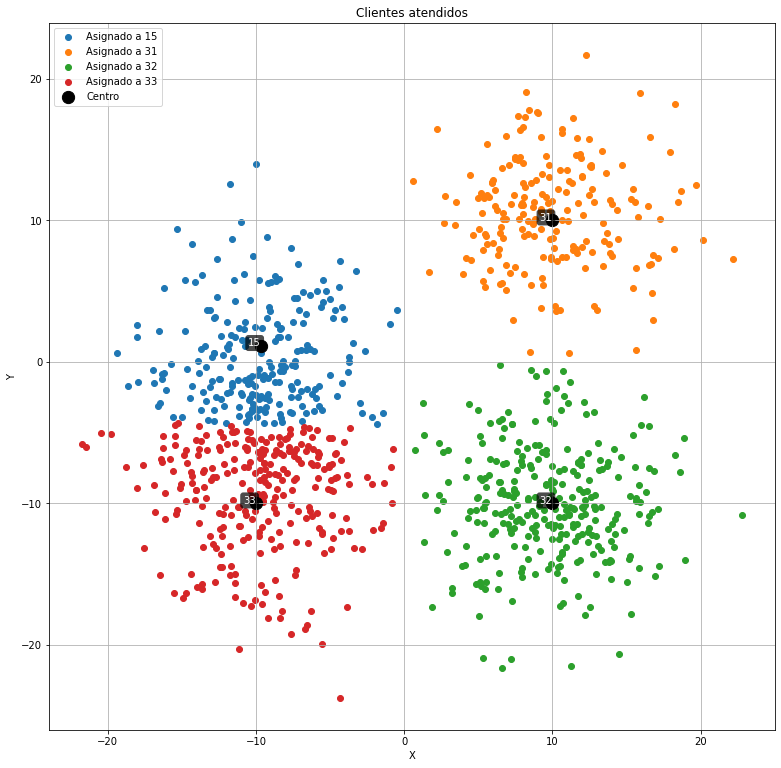

In [38]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente
    
####                                                   ####


plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')



plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=150, label=f'Centro')

for idx in sub_centros.index:
    plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
            fontsize=10, ha='right', color='white', 
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

## b)
### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i $$

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ p_{j} \quad \text{es 1 si el centro } j \text{ es pequeño y 0 si no} $$
$$ m_{j} \quad \text{es 1 si el centro } j \text{ es mediano y 0 si no} $$
$$ g_{j} \quad \text{es 1 si el centro } j \text{ es grande y 0 si no} $$

### Modelo:

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq p_j + m_j + g_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq  10000 \cdot p_j + 25000 \cdot m_j + 50000 \cdot g_j\quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

In [39]:
conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


problema2b = Model("problema 2b")

#Variables de decisión
x_ij = problema2b.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
p_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2b.setObjective(quicksum(matriz_c[i-1, j-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones
problema2b.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente 
problema2b.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2b.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (puede omitirse)
problema2b.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2b.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)

problema2b.optimize()



Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71070 rows, 35105 columns and 245210 nonzeros
Model fingerprint: 0x4a504f6c
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e-02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 35000 rows and 0 columns
Presolve time: 0.12s
Presolved: 36070 rows, 35105 columns, 210210 nonzeros
Variable types: 35000 continuous, 105 integer (105 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.02s

Solved with dual simplex

Root relaxation: objective 1.364364e+04, 1397 iterations, 0.24 seconds (0.43 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexp

In [40]:
print(f"los costos mínimos totales son {problema2b.ObjVal}")

m = len(data_centros)

vars = problema2b.getVars()

vars_x=[]
vars_p=[]
vars_m=[]
vars_g=[]

for var in vars:
    if var.VarName.startswith("x_"):
        vars_x.append(var)
    elif var.VarName.startswith("p_"):
        vars_p.append(var)
    elif var.VarName.startswith("m_"):
        vars_m.append(var)
    elif var.VarName.startswith("g_"):
        vars_g.append(var)

variables_activas_x = [var for var in vars_x if var.x != 0]
variables_activas_p = [var for var in vars_p if var.x != 0]
variables_activas_m = [var for var in vars_m if var.x != 0]
variables_activas_g = [var for var in vars_g if var.x != 0]


los costos mínimos totales son 13696.680808775021


In [41]:
#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales

[<gurobi.Var x_ij[96,2] (value 0.9772302203124742)>,
 <gurobi.Var x_ij[96,9] (value 0.022769779687525804)>,
 <gurobi.Var x_ij[238,15] (value 0.4736057544875601)>,
 <gurobi.Var x_ij[238,29] (value 0.52639424551244)>,
 <gurobi.Var x_ij[557,4] (value 0.20299647084197414)>,
 <gurobi.Var x_ij[557,11] (value 0.7970035291580259)>,
 <gurobi.Var x_ij[764,11] (value 0.9852950565123054)>,
 <gurobi.Var x_ij[764,16] (value 0.014704943487694602)>,
 <gurobi.Var x_ij[920,5] (value 0.7127770107744134)>,
 <gurobi.Var x_ij[920,6] (value 0.28722298922558664)>]

In [42]:
clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")

En el centro 2 se atienden los clientes: [10, 17, 45, 59, 86, 87, 96, 107, 116, 136, 154, 159, 184, 190, 202, 208, 214, 228, 340, 345, 364, 372, 391, 400, 401, 411, 427, 445, 463, 480, 481, 484, 488, 497, 499, 532, 556, 562, 565, 566, 572, 584, 585, 587, 594, 596, 604, 628, 661, 664, 682, 738, 757, 766, 774, 796, 816, 831, 834, 866, 880, 927, 942, 964, 994]
En el centro 3 se atienden los clientes: [23, 30, 75, 100, 141, 158, 160, 225, 245, 263, 298, 324, 349, 360, 371, 425, 433, 471, 492, 519, 590, 610, 614, 662, 722, 808, 853, 962, 966]
En el centro 4 se atienden los clientes: [2, 48, 66, 127, 134, 164, 209, 215, 219, 248, 255, 259, 268, 275, 305, 314, 332, 390, 395, 409, 439, 449, 451, 486, 487, 493, 512, 545, 554, 557, 576, 591, 597, 618, 658, 659, 663, 667, 689, 694, 699, 701, 710, 724, 734, 779, 781, 784, 797, 815, 817, 828, 837, 871, 897, 911, 916, 939, 946, 952, 959, 981, 983, 997]
En el centro 5 se atienden los clientes: [1, 12, 32, 123, 128, 145, 173, 174, 218, 227, 258, 274, 

In [50]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente

####                                                   ####

cant_centros= len(variables_activas_p)+len(variables_activas_m)+len(variables_activas_g)
tipos_centros = pd.DataFrame(index=range(cant_centros), columns=['tamaño'])


centrosp = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_p}
centrosm = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_m}
centrosg = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_g}


for idx, centro in enumerate(centros_j):
    if centro in centrosp:
        tipos_centros.loc[idx, 'tamaño'] = 'pequeño'
    elif centro in centrosm:
        tipos_centros.loc[idx, 'tamaño'] = 'mediano'
    elif centro in centrosg:
        tipos_centros.loc[idx, 'tamaño'] = 'grande'

tipos_centros.index = sub_centros.index

for idx in tipos_centros.index:
    print(f'El centro {idx} es de tamaño {tipos_centros.loc[idx, "tamaño"]} y está ubicado en ({data_centros.loc[idx,"x"]} , {data_centros.loc[idx,"y"]})')


El centro 2 es de tamaño pequeño y está ubicado en (7.9829 , -6.6164)
El centro 3 es de tamaño pequeño y está ubicado en (-16.3669 , -7.0845)
El centro 4 es de tamaño pequeño y está ubicado en (-12.8194 , -4.2092)
El centro 5 es de tamaño pequeño y está ubicado en (9.4519 , -11.0707)
El centro 6 es de tamaño pequeño y está ubicado en (12.4499 , -11.7062)
El centro 7 es de tamaño pequeño y está ubicado en (16.6514 , 6.943)
El centro 9 es de tamaño pequeño y está ubicado en (11.418 , -7.7356)
El centro 10 es de tamaño pequeño y está ubicado en (-4.8833 , -10.8051)
El centro 11 es de tamaño pequeño y está ubicado en (-10.0572 , -7.8226)
El centro 13 es de tamaño pequeño y está ubicado en (-12.1965 , -10.7258)
El centro 14 es de tamaño pequeño y está ubicado en (-16.3628 , -1.2345)
El centro 15 es de tamaño pequeño y está ubicado en (-9.6576 , 1.1241)
El centro 16 es de tamaño pequeño y está ubicado en (-7.7334 , -3.5135)
El centro 17 es de tamaño pequeño y está ubicado en (8.1011 , 6.1869

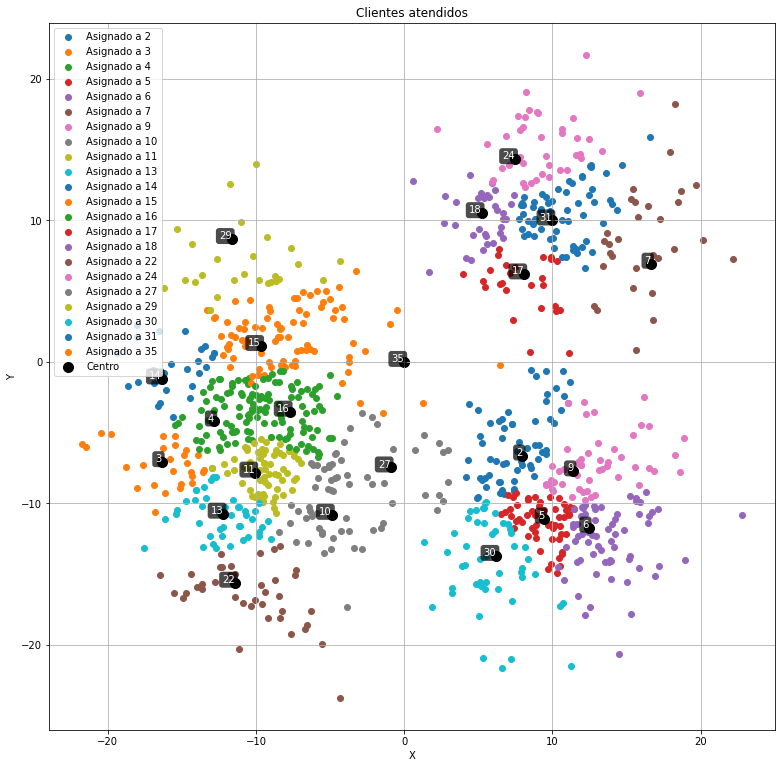

In [51]:

#GRAFICAMOS 

plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')


plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=100, label=f'Centro')



for idx in sub_centros.index:
    if tipos_centros.loc[idx, 'tamaño'] == 'pequeño':
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=80)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "mediano":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=250)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "grande":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=300)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))



plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

In [52]:
porcentaje = ((problema2b.ObjVal-problema2.ObjVal)/problema2.ObjVal)*100
print(f'En el problema b) los costos disminuyen en un {abs(porcentaje)}%, pasando de ${problema2.ObjVal} a ${problema2b.ObjVal}')
porcentaje = ((problema2b.ObjVal-costos_conins)/costos_conins)*100
print(f'Si incluimos los costos de instalación en el problema a), los costos disminuyen en un {abs(porcentaje)}%, pasando de ${costos_conins} a ${problema2b.ObjVal}')

En el problema b) los costos disminuyen en un 53.140177547118526%, pasando de $29229.04973134996 a $13696.680808775021
Si incluimos los costos de instalación en el problema a), los costos disminuyen en un 58.02304718787056%, pasando de $32629.04973134996 a $13696.680808775021


## c)

### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i $$
$$ a_{j} \quad \text{es la coordenada x del centro } j $$
$$ b_{j} \quad \text{es la coordenada y del centro } j $$

(tanto a como b se utilizaron para plantear el modelo, pero no se utilizaron al resolver, ya que mediante código se hicieron ciclos para llevar a cabo las mismas restricciones)

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ p_{j} \quad \text{es 1 si el centro } j \text{ es pequeño y 0 si no} $$
$$ m_{j} \quad \text{es 1 si el centro } j \text{ es mediano y 0 si no} $$
$$ g_{j} \quad \text{es 1 si el centro } j \text{ es grande y 0 si no} $$

### Modelo:

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq p_j + m_j + g_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq  10000 \cdot p_j + 25000 \cdot m_j + 50000 \cdot g_j\quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

### Restricciones agregadas:

$$
a_j \leq -1
$$
$$
a_j \geq 11
$$
*No se pueden construir centros en la reserva natural (coordenadas x)*

$$
b_j \leq -5
$$
$$
b_j \geq 10
$$
*No se pueden construir centros en la reserva natural (coordenadas y)*

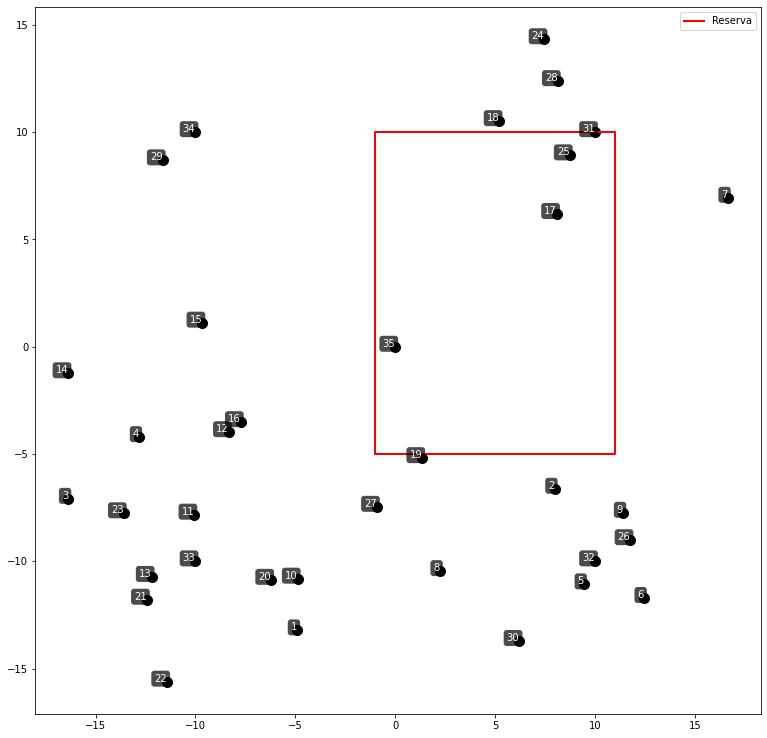

In [53]:

### PRIMERO VISUALIZAMOS LA RESTRICCIÓN
plt.figure(figsize=(13, 13))

for idx in data_centros.index:
    plt.scatter(data_centros.loc[idx, 'x'], data_centros.loc[idx, 'y'], color='black', s=100)
    plt.text(data_centros.loc[idx, 'x'], data_centros.loc[idx, 'y'], f'{idx}', fontsize=10, ha='right', color='white',
         bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Coordenadas de los vértices del rectángulo
rect_x = [-1, -1, 11, 11, -1]  
rect_y = [-5, 10, 10, -5, -5]

plt.plot(rect_x, rect_y, 'r-', linewidth=2, label='Reserva')
#plt.grid(True)
plt.legend()

plt.show()

In [55]:
conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


problema2c = Model("problema 2c")

#Variables de decisión
x_ij = problema2c.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
p_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2c.setObjective(quicksum(matriz_c[i-1, j-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones

c_reserva=[]
for j in conjunto_M:
    if data_centros.iloc[j-1,0] >= -1 and data_centros.iloc[j-1,0] <=11 :
        if data_centros.iloc[j-1,1] >= -5 and data_centros.iloc[j-1,1] <= 10:
            c_reserva.append(j)
            print(j)

# Obligamos a que no se construya el centro (la variable sea 0) si es que se encuentra dentro de la reserva
problema2c.addConstrs(p_j[j]== 0 for j in c_reserva)
problema2c.addConstrs(m_j[j]== 0 for j in c_reserva)
problema2c.addConstrs(g_j[j]== 0 for j in c_reserva)


problema2c.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  
problema2c.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2c.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (puede omitirse)
problema2c.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2c.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)

problema2c.optimize()

17
25
31
35
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71082 rows, 35105 columns and 245222 nonzeros
Model fingerprint: 0x4b5c9f13
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e-02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 39020 rows and 4012 columns
Presolve time: 0.11s
Presolved: 32062 rows, 31093 columns, 186186 nonzeros
Variable types: 31000 continuous, 93 integer (93 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.02s

Solved with dual simplex

Root relaxation: objective 1.463614e+04, 1228 iterations, 0.21 seconds (0.41 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wor

In [56]:
print(f"los costos mínimos totales son {problema2c.ObjVal}")

m = len(data_centros)

vars = problema2c.getVars()

vars_x=[]
vars_p=[]
vars_m=[]
vars_g=[]

for var in vars:
    if var.VarName.startswith("x_"):
        vars_x.append(var)
    elif var.VarName.startswith("p_"):
        vars_p.append(var)
    elif var.VarName.startswith("m_"):
        vars_m.append(var)
    elif var.VarName.startswith("g_"):
        vars_g.append(var)

variables_activas_x = [var for var in vars_x if var.x != 0]
variables_activas_p = [var for var in vars_p if var.x != 0]
variables_activas_m = [var for var in vars_m if var.x != 0]
variables_activas_g = [var for var in vars_g if var.x != 0]

los costos mínimos totales son 14750.30430923664


In [57]:
#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales

[<gurobi.Var x_ij[588,24] (value 0.5681342041825928)>,
 <gurobi.Var x_ij[588,28] (value 0.4318657958174073)>,
 <gurobi.Var x_ij[657,15] (value 0.8640764483820752)>,
 <gurobi.Var x_ij[657,16] (value 0.13592355161792483)>,
 <gurobi.Var x_ij[831,2] (value 0.9508395165739998)>,
 <gurobi.Var x_ij[831,5] (value 0.049160483426000184)>,
 <gurobi.Var x_ij[889,11] (value 0.8906897877085174)>,
 <gurobi.Var x_ij[889,13] (value 0.10931021229148263)>,
 <gurobi.Var x_ij[907,16] (value 0.7498587856080539)>,
 <gurobi.Var x_ij[907,20] (value 0.25014121439194614)>,
 <gurobi.Var x_ij[920,5] (value 0.7127770107744172)>,
 <gurobi.Var x_ij[920,6] (value 0.28722298922558276)>]

In [58]:

clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    coordenada_x = data_centros.loc[j, 'x']
    coordenada_y = data_centros.loc[j, 'y']
    print(f"En el centro {j} ubicado en ({coordenada_x}, {coordenada_y}) se atienden los clientes: {clientes}")


En el centro 2 ubicado en (7.9829, -6.6164) se atienden los clientes: [10, 17, 86, 87, 107, 116, 124, 136, 154, 159, 184, 190, 202, 208, 214, 228, 244, 340, 345, 364, 372, 391, 400, 401, 411, 427, 445, 463, 475, 480, 481, 484, 488, 497, 499, 532, 556, 562, 565, 566, 572, 584, 585, 587, 594, 596, 604, 628, 661, 664, 682, 738, 757, 766, 774, 796, 816, 831, 834, 866, 880, 927, 942, 964, 994]
En el centro 3 ubicado en (-16.3669, -7.0845) se atienden los clientes: [23, 30, 75, 100, 141, 158, 160, 225, 245, 263, 298, 324, 349, 360, 371, 425, 433, 471, 492, 519, 590, 610, 614, 662, 722, 808, 853, 962, 966]
En el centro 4 ubicado en (-12.8194, -4.2092) se atienden los clientes: [2, 48, 66, 71, 127, 134, 164, 209, 215, 219, 239, 248, 255, 259, 268, 275, 305, 314, 330, 390, 395, 409, 439, 449, 451, 486, 487, 493, 512, 545, 554, 576, 591, 597, 618, 658, 659, 663, 667, 689, 694, 699, 701, 710, 724, 734, 779, 781, 784, 797, 815, 817, 828, 837, 871, 897, 911, 916, 939, 946, 952, 959, 981, 983, 997]


In [60]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente

####                                                   ####

cant_centros= len(variables_activas_p)+len(variables_activas_m)+len(variables_activas_g)
tipos_centros = pd.DataFrame(index=range(cant_centros), columns=['tamaño'])


centrosp = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_p}
centrosm = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_m}
centrosg = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_g}


for idx, centro in enumerate(centros_j):
    if centro in centrosp:
        tipos_centros.loc[idx, 'tamaño'] = 'pequeño'
    elif centro in centrosm:
        tipos_centros.loc[idx, 'tamaño'] = 'mediano'
    elif centro in centrosg:
        tipos_centros.loc[idx, 'tamaño'] = 'grande'

tipos_centros.index = sub_centros.index

for idx in tipos_centros.index:
    print(f'El centro {idx} es de tamaño {tipos_centros.loc[idx, "tamaño"]}')

El centro 2 es de tamaño pequeño
El centro 3 es de tamaño pequeño
El centro 4 es de tamaño pequeño
El centro 5 es de tamaño pequeño
El centro 6 es de tamaño pequeño
El centro 7 es de tamaño pequeño
El centro 9 es de tamaño pequeño
El centro 11 es de tamaño pequeño
El centro 13 es de tamaño pequeño
El centro 14 es de tamaño pequeño
El centro 15 es de tamaño pequeño
El centro 16 es de tamaño pequeño
El centro 18 es de tamaño pequeño
El centro 20 es de tamaño pequeño
El centro 22 es de tamaño pequeño
El centro 24 es de tamaño pequeño
El centro 27 es de tamaño pequeño
El centro 28 es de tamaño pequeño
El centro 29 es de tamaño pequeño
El centro 30 es de tamaño pequeño


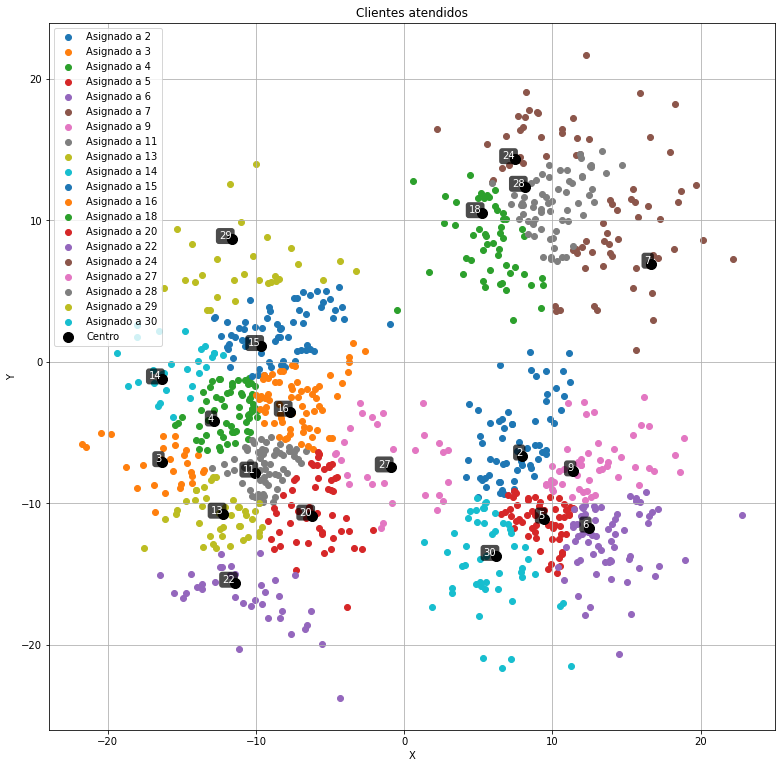

In [61]:

plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')


plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=100, label=f'Centro')



for idx in sub_centros.index:
    if tipos_centros.loc[idx, 'tamaño'] == 'pequeño':
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=80)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "mediano":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=250)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "grande":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=300)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

In [62]:
porcentaje = ((problema2c.ObjVal-problema2b.ObjVal)/problema2b.ObjVal)*100
print(f'En el problema c) los costos aumentan en un {abs(porcentaje)}% comparando con la solución b), pasando de ${problema2b.ObjVal} a ${problema2c.ObjVal}')

En el problema c) los costos aumentan en un 7.692546210075923% comparando con la solución b), pasando de $13696.680808775021 a $14750.30430923664


# Problema 3

Problema 3.a


Se quiere minimizar la distancia entre ubicaciones en un espacio bidimensional. La distancia entre el centro de la habitación hacia los puestos de los operadores se define como:
$$
min  \sum_{i=1}^n\ d((x,y),(a_{i},b_{i}))\\
$$
Donde d representa el calculo de la distancia desde el punto centro (x,y) y cada uno de los puestos operadores con coordenadas (a_i,b_i)
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i 
$$
Ninguna ubicación puede quedar a menos de dos metros de las paredes
$$
d((a_i, b_i), (a_j, b_j)) \geq 3 \quad \forall i \neq j
$$
La distancia entre cualquiera de las estaciones debe ser al menos de 3 metros

Pregunta 3b.1\
\
Método centro de gravedad (distancia euclidiana)
$$
min  \left(\sum_{i=1}^n\ d(x, y), (a_i, b_i) \right) = \sqrt{(x - a_i)^2 + (y - b_i)^2}\\
$$
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i
$$
$$
\sqrt{(x_i - a_i)^2 + (y_i - b_i)^2} \geq 3, \quad \forall i \neq j
$$


# Distancia Euclidiana

Coordenadas óptimas para los 4 puntos:
Punto 1: (x, y) = (6.7060, 3.5967)
Punto 2: (x, y) = (5.3786, 6.2871)
Punto 3: (x, y) = (3.7124, 3.7924)
Punto 4: (x, y) = (8.3723, 6.0917)
Valor de la función objetivo (distancia total): 8.198322279787302


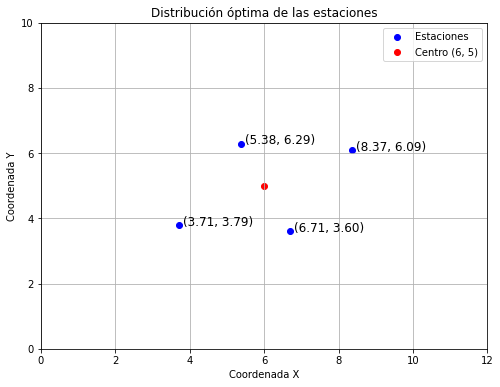

In [31]:
#Distancia euclidiana
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import cdist

# Función objetivo: Minimizar la suma de las distancias euclidianas al centro (6, 5)
def objective(x):
    # x es un vector de tamaño 8, representando las coordenadas de las 4 estaciones
    stations = x.reshape(4, 2)
    # Calcular las distancias al centro (6, 5)
    distances = np.sqrt((stations[:, 0] - 6)**2 + (stations[:, 1] - 5)**2)
    return np.sum(distances)

# Restricción 1: Límites de las coordenadas
def constraint1(x):
    stations = x.reshape(4, 2)
    # Verificar que las coordenadas estén dentro de los límites [2, 10] para x y [2, 8] para y
    return np.array([np.min(stations, axis=0) - [2, 2], [10, 8] - np.max(stations, axis=0)]).flatten()

# Restricción 2: Distancia mínima entre estaciones
def constraint2(x):
    stations = x.reshape(4, 2)
    distances_between_stations = cdist(stations, stations)
    np.fill_diagonal(distances_between_stations, np.inf)  # Ignorar la distancia de una estación a sí misma
    return np.min(distances_between_stations) - 3  # Las estaciones deben estar al menos a 3 metros de distancia

# Condiciones iniciales
x0 = np.random.uniform(2, 10, size=8)

# Definir las restricciones
cons = (
    {'type': 'ineq', 'fun': constraint1},  # Límites en las coordenadas
    {'type': 'ineq', 'fun': constraint2}   # Distancia mínima entre estaciones
)

# Resolver el problema de optimización
sol = minimize(objective, x0, method='SLSQP', constraints=cons, bounds=[(2, 10), (2, 8)]*4)

# Obtener las coordenadas óptimas
#optimal_stations = sol.x.reshape(4, 2)
#print("Coordenadas óptimas de las estaciones:")
#print(optimal_stations)
#print(sol.fun)

ubicaciones_optimas = sol.x.reshape((4, 2))
print("Coordenadas óptimas para los 4 puntos:")
for i, punto in enumerate(ubicaciones_optimas, start=1):
    print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
print("Valor de la función objetivo (distancia total):", sol.fun)
    
center = [6, 5]
    
# Crear la figura
plt.figure(figsize=(8, 6))
    
# Graficar las estaciones
plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')

# Graficar el centro de gravedad
plt.scatter(center[0], center[1], color='red', label='Centro (6, 5)')

# Límites del gráfico
plt.xlim(0, 12)
plt.ylim(0, 10)

# Añadir etiquetas y título
plt.title('Distribución óptima de las estaciones')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añadir etiquetas a las estaciones junto con las coordenadas
for i, (x, y) in enumerate(ubicaciones_optimas):
    plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=12, color='black')

# Mostrar la leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()

# Distancia Manhattan
$$ min f(x, y) = \sum_{i=1}^{n} \omega_i \left( |x - a_i| + |y - b_i| \right)$$
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i
$$
$$|x - a_i| + |y - b_i| \geq 3 \quad \forall i \neq j$$



Coordenadas óptimas para los 4 puntos:
Punto 1: (x, y) = (4.5000, 5.0000)
Punto 2: (x, y) = (6.0000, 6.5000)
Punto 3: (x, y) = (7.5000, 5.0000)
Punto 4: (x, y) = (6.0000, 3.5000)
Valor de la función objetivo (distancia total): 6.000001221322552


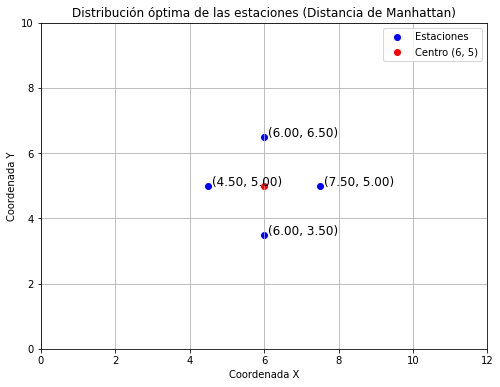

In [32]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Función objetivo: Minimizar la suma de las distancias de Manhattan al centro (6, 5)
def objective(x):
    # x es un vector de tamaño 8, representando las coordenadas de las 4 estaciones
    stations = x.reshape(4, 2)
    # Calcular las distancias de Manhattan al centro (6, 5)
    distances = np.abs(stations[:, 0] - 6) + np.abs(stations[:, 1] - 5)
    return np.sum(distances)

# Restricción 1: Límites de las coordenadas
def constraint1(x):
    stations = x.reshape(4, 2)
    # Verificar que las coordenadas estén dentro de los límites [2, 10] para x y [2, 8] para y
    return np.array([np.min(stations, axis=0) - [2, 2], [10, 8] - np.max(stations, axis=0)]).flatten()

# Restricción 2: Distancia mínima de Manhattan entre estaciones
def constraint2(x):
    stations = x.reshape(4, 2)
    # Calcular la matriz de distancias de Manhattan entre estaciones
    distances_between_stations = cdist(stations, stations, metric='cityblock') #cityblock es lo mismo que manhattan
    np.fill_diagonal(distances_between_stations, np.inf)  # Ignorar la distancia de una estación a sí misma
    return np.min(distances_between_stations) - 3  # Las estaciones deben estar al menos a 3 metros de distancia

# Condiciones iniciales
x0 = np.random.uniform(2, 10, size=8)

# Definir las restricciones
cons = (
    {'type': 'ineq', 'fun': constraint1},  # Límites en las coordenadas
    {'type': 'ineq', 'fun': constraint2}   # Distancia mínima entre estaciones
)

# Resolver el problema de optimización
sol = minimize(objective, x0, method='SLSQP', constraints=cons, bounds=[(2, 10), (2, 8)]*4)

# Obtener las coordenadas óptimas
ubicaciones_optimas = sol.x.reshape((4, 2))
print("Coordenadas óptimas para los 4 puntos:")
for i, punto in enumerate(ubicaciones_optimas, start=1):
    print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
print("Valor de la función objetivo (distancia total):", sol.fun)
    
center = [6, 5]

# Crear la figura
plt.figure(figsize=(8, 6))
    
# Graficar las estaciones
plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')

# Graficar el centro de gravedad
plt.scatter(center[0], center[1], color='red', label='Centro (6, 5)')

# Límites del gráfico
plt.xlim(0, 12)
plt.ylim(0, 10)

# Añadir etiquetas y título
plt.title('Distribución óptima de las estaciones (Distancia de Manhattan)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añadir etiquetas a las estaciones junto con las coordenadas
for i, (x, y) in enumerate(ubicaciones_optimas):
    plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=12, color='black')

# Mostrar la leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()

# Distancia Cuadrática 
$$f(x, y) = \sum_{i=1}^{n} \omega_i \left( (x - a_i)^2 + (y - b_i)^2 \right)$$
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i
$$
$$ (x - a_i)^2 + (y - b_i)^2 \geq 3 \quad \forall i \neq j$$

Punto 1: (x, y) = (4.6184, 4.6561)
Punto 2: (x, y) = (6.2382, 4.0428)
Punto 3: (x, y) = (5.7616, 5.9572)
Punto 4: (x, y) = (7.3815, 5.3439)
Valor de la función objetivo (distancia total): 6.00000021253282


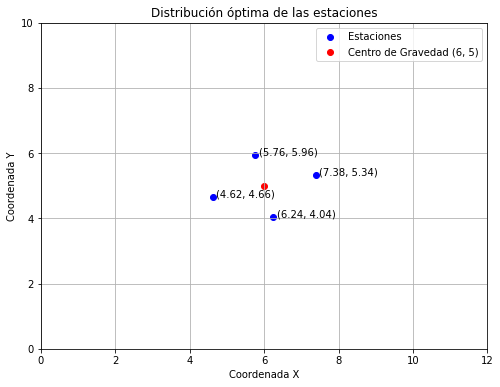

In [33]:
#Distancia Cuadratica
from scipy.optimize import minimize
import numpy as np

# Definir el centro de la región
centro = np.array([6, 5])

# Función objetivo: minimiza la suma de las distancias desde las 4 estaciones al centro
def funcion_objetivo(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))  # Convertir el vector de 8 elementos en 4 pares de coordenadas
    distancia_total = 0
    for estacion in ubicaciones:
        # Suma la distancia euclidiana de cada estación al centro
        distancia_total += (estacion[0] - centro[0])**2 + (estacion[1] - centro[1])**2
    return distancia_total

# Restricción: ninguna estación puede estar a menos de 2 metros de las paredes
def restriccion_paredes(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_paredes = []
    for estacion in ubicaciones:
        # Restricción para cada eje (x: [2, 10], y: [2, 8])
        dist_paredes.append(estacion[0] - 2)    # distancia al borde izquierdo
        dist_paredes.append(10 - estacion[0])   # distancia al borde derecho
        dist_paredes.append(estacion[1] - 2)    # distancia al borde inferior
        dist_paredes.append(8 - estacion[1])    # distancia al borde superior
    return np.array(dist_paredes)

# Restricción: distancia mínima entre estaciones debe ser de al menos 3 metros
def restriccion_distancia_minima(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_minima = []
    for i in range(len(ubicaciones)):
        for j in range(i + 1, len(ubicaciones)):
            # Calcular la distancia entre cada par de estaciones
            dist_ij = (ubicaciones[i][0] - ubicaciones[j][0])**2 + (ubicaciones[i][1] - ubicaciones[j][1])**2
            dist_minima.append(dist_ij - 3)  # distancia debe ser mayor o igual a 3
    return np.array(dist_minima)

# Restricción: ninguna estación puede estar en el centro
def restriccion_centro(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_centro = []
    for estacion in ubicaciones:
        # Asegurarse de que la estación no esté exactamente en el centro
        dist_centro.append(np.linalg.norm(estacion - centro) - 0.1)  # evitar que esté exactamente en el centro
    return np.array(dist_centro)

# Inicializar ubicaciones iniciales (aleatoriamente dentro de la región)
x_inicial = np.random.uniform(2, 10, size=(8,))  # 4 estaciones con coordenadas x, y

# Definir las restricciones
restricciones = [
    {'type': 'ineq', 'fun': restriccion_paredes},        # distancia mínima a las paredes
    {'type': 'ineq', 'fun': restriccion_distancia_minima}, # distancia mínima entre estaciones
    {'type': 'ineq', 'fun': restriccion_centro}         # evitar el centro
]

# Ejecutar la optimización
resultado = minimize(funcion_objetivo, x_inicial, constraints=restricciones, method='SLSQP')

# Mostrar resultados
if resultado.success:
    ubicaciones_optimas = resultado.x.reshape((4, 2))
    for i, punto in enumerate(ubicaciones_optimas, start=1):
        print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
    print("Valor de la función objetivo (distancia total):", resultado.fun)
    center = [6, 5]
    
    # Crear la figura
    plt.figure(figsize=(8, 6))
    
    # Graficar las estaciones
    plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')
    
    # Graficar el centro de gravedad
    plt.scatter(center[0], center[1], color='red', label='Centro de Gravedad (6, 5)')
    
    # Límites del gráfico
    plt.xlim(0, 12)
    plt.ylim(0, 10)
    
    # Añadir etiquetas y título
    plt.title('Distribución óptima de las estaciones')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    
    # Añadir etiquetas a las estaciones junto con las coordenadas
    for i, (x, y) in enumerate(ubicaciones_optimas):
        plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=10, color='black')
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar la cuadrícula
    plt.grid(True)
    
    # Mostrar gráfico
    plt.show()
else:
    print("La optimización falló:", resultado.message)